<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Eq_do_Contraste_(usando_pyccl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outra forma de plotar o contraste $\delta_m$ é usar a biblioteca pyccl do Python, voltada para cálculos da Cosmologia. Porém, como esta biblioteca não tem no colab, é necessário instalar através do comando abaixo.

In [1]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

conda-forge/linux-64                                        Usin

In [3]:
import pyccl as ccl

In [23]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.5, 1, 1000)  # fator de escala
delta = ccl.growth_factor(cosmo, a)  # contraste

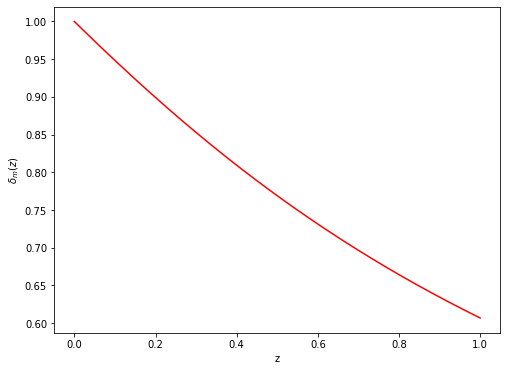

In [24]:
# definindo o redshift em função do fator de escala
z = (1/a) - 1.

# plotando o gráfico de delta x z
plt.figure(figsize=(8, 6))
plt.xlabel('z')
plt.ylabel('$\delta_m(z)$')
plt.plot(z, delta, color='red')
plt.show()

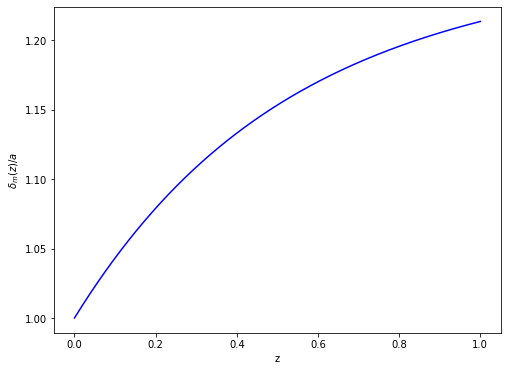

In [25]:
# agora vamos plotar a função g(a) = delta/a (aparece no artigo de Linder e Cahn)
g = delta/a

# agora vamos plotar a função g(a) = delta/a

plt.figure(figsize=(8, 6))
plt.xlabel('z')
plt.ylabel('$\delta_m(z)/a$')
plt.plot(z, g, color='blue')
plt.show()

Porém, $\delta_m$ não é um observável. Como queremos comparar os modelos alternativos com dados, precisamos da função $f$, defininda como:

$f(a) = \frac{d ln(\delta_m)}{d ln(a)}$.

Este parâmetro é um observável cosmológico e é chamado de função taxa de crescimento de estruturas.

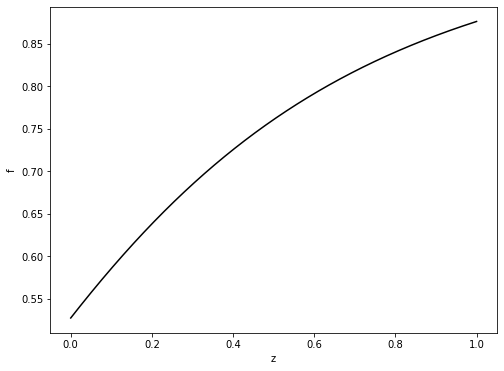

In [26]:
# definindo f com a biblioteca pyccl
f = ccl.background.growth_rate(cosmo, a)

# plotando f
plt.figure(figsize=(8, 6))
plt.xlabel('z')
plt.ylabel('f')
plt.plot(z, f, color='black')
plt.show()

Agora, vamos comparar a função taxa de crescimento $f$ com a função $g$.

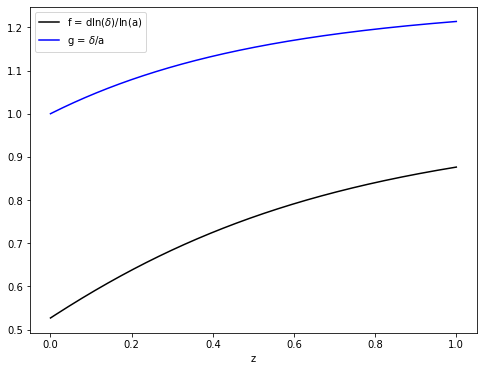

In [27]:
plt.figure(figsize=(8, 6))
plt.xlabel('z')
plt.plot(z, f, color='black', label='f = dln($\delta$)/ln(a)')
plt.plot(z, g, color='blue', label='g = $\delta$/a')
plt.legend()
plt.show()

# Vamos resolver a equação (1) do artigo do Linder e Cahn.

In [28]:
# definindo O_m
Om = ccl.background.omega_x(cosmo, a, 'matter')

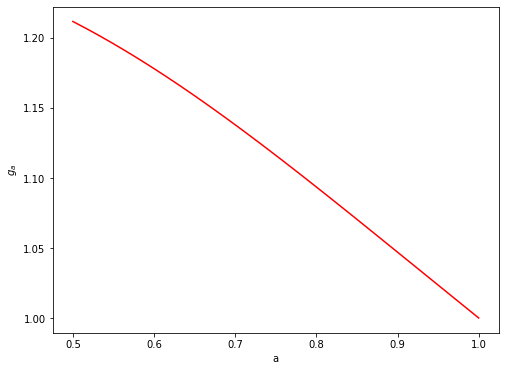

In [34]:
from scipy.integrate import cumtrapz


# vamos definir a equação (1) do artigo
gamma = 6./11.

I = cumtrapz(((Om ** gamma) - 1)/a, x=a, initial=0.000001)

g_a = np.exp(I)

g_a = g_a/g_a[-1]

# vamos plotar a equação
plt.figure(figsize=(8, 6))
plt.plot(a, g_a, color='red')
plt.xlabel('a')
plt.ylabel('$g_a$')
plt.show()

# Agora, vamos plotar a solução exata $G(a)$.

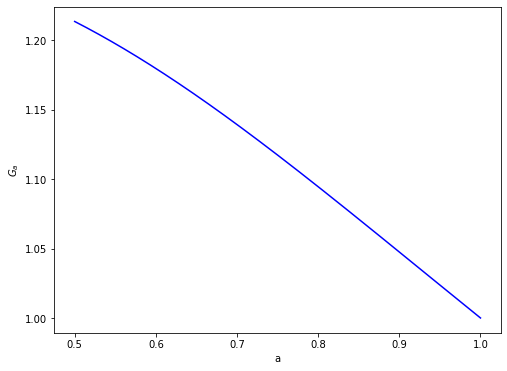

In [35]:
G_a = ccl.growth_factor(cosmo, a)/a

# vamos plotar a solução exata
plt.figure(figsize=(8, 6))
plt.plot(a, G_a, color='blue')
plt.xlabel('a')
plt.ylabel('$G_a$')
plt.show()

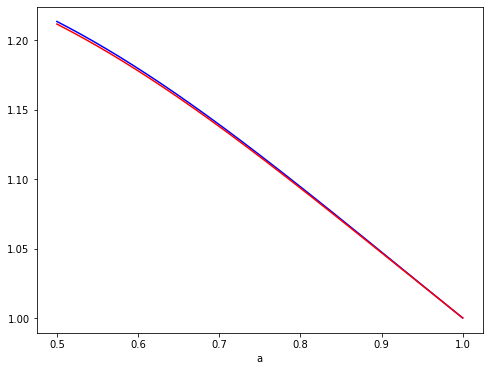

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(a, G_a, color='blue')
plt.plot(a, g_a, color='red')
plt.xlabel('a')
plt.show()

# Agora, vamos calcular a diferença entre as curvas.

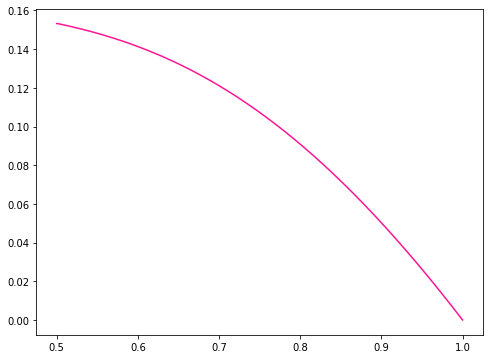

In [37]:
dif = abs((g_a - G_a)/G_a) * 100

plt.figure(figsize=(8, 6))
plt.plot(a, dif, color='deeppink')
plt.show()

In [33]:
print(dif)

[3.33530311e+01 3.32931755e+01 3.32335436e+01 3.31740021e+01
 3.31145515e+01 3.30551916e+01 3.29959220e+01 3.29367422e+01
 3.28776518e+01 3.28186505e+01 3.27597379e+01 3.27009147e+01
 3.26421807e+01 3.25835357e+01 3.25249790e+01 3.24665105e+01
 3.24081296e+01 3.23498360e+01 3.22916301e+01 3.22335122e+01
 3.21754817e+01 3.21175384e+01 3.20596818e+01 3.20019115e+01
 3.19442271e+01 3.18866289e+01 3.18291173e+01 3.17716918e+01
 3.17143521e+01 3.16570978e+01 3.15999285e+01 3.15428438e+01
 3.14858438e+01 3.14289289e+01 3.13720989e+01 3.13153534e+01
 3.12586920e+01 3.12021144e+01 3.11456201e+01 3.10892090e+01
 3.10328817e+01 3.09766380e+01 3.09204774e+01 3.08643998e+01
 3.08084046e+01 3.07524916e+01 3.06966605e+01 3.06409116e+01
 3.05852451e+01 3.05296606e+01 3.04741577e+01 3.04187361e+01
 3.03633955e+01 3.03081354e+01 3.02529563e+01 3.01978582e+01
 3.01428409e+01 3.00879041e+01 3.00330473e+01 2.99782703e+01
 2.99235727e+01 2.98689546e+01 2.98144164e+01 2.97599578e+01
 2.97055784e+01 2.965127